In [1]:
import numpy as np 
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
from scipy.io import loadmat
mnist = loadmat("mnist-original.mat")

In [3]:
x = mnist['data'].T
y = mnist['label'][0]

In [4]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(52500, 784)
(17500, 784)


In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)

(52500, 28, 28, 1)


In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
y_train[0]

(52500, 10)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

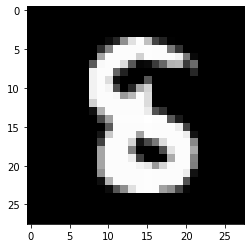

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
g = plt.imshow(x_train[69][:,:,0],"gray")

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dense(120, activation='relu'))
model.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 5, 5, 120)         7800      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30010     
Total para

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

W0823 16:39:46.059291 4503549376 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 16:39:46.078110 4503549376 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
model_log = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=5,
         verbose=1,
         validation_data=(x_test, y_test))

W0823 16:39:50.026492 4503549376 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 16:39:50.161545 4503549376 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 52500 samples, validate on 17500 samples
Epoch 1/5
52500/52500 [==============================] - 33s 632us/step - loss: 2.4292 - acc: 0.8074 - val_loss: 0.1699 - val_acc: 0.9438
Epoch 2/5
52500/52500 [==============================] - 36s 678us/step - loss: 0.0688 - acc: 0.9784 - val_loss: 0.0628 - val_acc: 0.9800
Epoch 3/5
52500/52500 [==============================] - 33s 638us/step - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0672 - val_acc: 0.9786
Epoch 4/5
52500/52500 [==============================] - 35s 662us/step - loss: 0.0312 - acc: 0.9900 - val_loss: 0.0465 - val_acc: 0.9871
Epoch 5/5
52500/52500 [==============================] - 32s 616us/step - loss: 0.0225 - acc: 0.9925 - val_loss: 0.0449 - val_acc: 0.9871


In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.04492898759098857
Test accuracy:  0.9871428571428571
